<a href="https://colab.research.google.com/github/jclauss24/MTLSA_Project/blob/main/Analysis/Process_data_every_four_days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
mainData = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data.csv')

# need to interpolate so we have data every four days because WE DONT HAVE DATA FOR THE WEEKENDS GODDAMN IT

# how do I create a date array of every four days

mainData.head()

,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,2025-03-14,315.493,9871.433801,330.159478,9884.680244,9709.470078,165.49,31995890,211.250,166.4900,162.45,213.9500,60107580,211.250,213.9500,209.58
1,2025-03-13,315.493,9541.274322,-169.153609,9716.739851,9476.858596,162.76,31756210,215.950,166.1300,162.11,216.8394,61368330,215.950,216.8394,208.42
2,2025-03-12,315.493,9710.427932,126.454775,9841.303834,9611.226680,167.11,28372400,220.140,167.6399,163.53,221.7500,62547470,220.140,221.7500,214.91
3,2025-03-11,315.493,9583.973157,35.421132,9740.399484,9449.367405,164.04,39587410,223.805,166.7500,161.37,225.8399,76137410,223.805,225.8399,217.45
4,2025-03-10,315.493,9548.552025,-495.741338,9815.136880,9448.979167,165.87,43604030,235.540,168.4600,163.69,236.1600,72071200,235.540,236.1600,224.22


In [ ]:
mainData.tail()

,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
2511,2015-03-20,236.599,2431.813822,24.085556,2438.290063,2419.281267,28.2475,44255280,32.0625,28.3550,28.2240,32.1000,274064720,32.0625,32.1000,31.2900
2512,2015-03-19,236.599,2407.728266,6.837807,2413.031434,2397.520622,28.1835,24606960,32.1875,28.3480,28.1060,32.3113,182698080,32.1875,32.3113,31.8500
2513,2015-03-18,236.599,2400.890458,24.470892,2412.045072,2355.792903,28.3080,35243380,31.7500,28.3255,27.6750,32.2900,260472680,31.7500,32.2900,31.5925
2514,2015-03-17,236.599,2376.419566,-7.932393,2381.045652,2364.030696,27.8805,28879820,31.4750,28.0320,27.7205,31.8300,203564920,31.4750,31.8300,31.4125
2515,2015-03-16,236.599,2384.351959,34.024568,2385.589570,2362.563697,28.0820,36818620,30.9700,28.1875,27.5660,31.2375,143265200,30.9700,31.2375,30.7175


In [ ]:
# prompt: impute the data in mainData to have data every 4 days

import pandas as pd
# Assuming mainData and the necessary import are already present from the previous code

# Convert 'Date' column to datetime objects
mainData['Date'] = pd.to_datetime(mainData['Date'])

# Create a date range with 4-day intervals
date_rng = pd.date_range(start=mainData['Date'].min(), end=mainData['Date'].max(), freq='4D')

# Create a new DataFrame with the complete date range
new_data = pd.DataFrame({'Date': date_rng})

# Merge the new DataFrame with the original DataFrame
mainData = pd.merge(new_data, mainData, on='Date', how='left')

# Interpolate the missing values.  Method='linear' is a basic option.
# Consider other interpolation methods (e.g. 'polynomial', 'spline')
# based on your data's characteristics.
mainData = mainData.set_index('Date')
mainData = mainData.interpolate(method='linear')
mainData = mainData.reset_index()

# Display the first few rows of the updated DataFrame
mainData.head()


,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,2015-03-16,236.599,2384.351959,34.024568,2385.589570,2362.563697,28.08200,36818620.0,30.97000,28.1875,27.5660,31.2375,143265200.0,30.97000,31.2375,30.7175
1,2015-03-20,236.599,2431.813822,24.085556,2438.290063,2419.281267,28.24750,44255280.0,32.06250,28.3550,28.2240,32.1000,274064720.0,32.06250,32.1000,31.2900
2,2015-03-24,236.599,2401.919857,-16.423713,2422.963888,2401.826579,28.87700,79040060.0,31.80750,29.0940,28.4045,32.0100,130988800.0,31.80750,32.0100,31.6400
3,2015-03-28,236.599,2372.316084,-13.033901,2385.998228,2363.860982,28.17575,58884350.0,31.50625,28.5095,27.8530,31.6450,146420680.0,31.50625,31.6450,31.2075
4,2015-04-01,236.599,2342.712311,-9.644089,2349.032568,2325.895386,27.47450,38728640.0,31.20500,27.9250,27.3015,31.2800,161852560.0,31.20500,31.2800,30.7750


In [ ]:
 mainData

,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,2015-03-16,236.599,2384.351959,34.024568,2385.589570,2362.563697,28.08200,36818620.0,30.97000,28.1875,27.5660,31.2375,143265200.0,30.97000,31.2375,30.7175
1,2015-03-20,236.599,2431.813822,24.085556,2438.290063,2419.281267,28.24750,44255280.0,32.06250,28.3550,28.2240,32.1000,274064720.0,32.06250,32.1000,31.2900
2,2015-03-24,236.599,2401.919857,-16.423713,2422.963888,2401.826579,28.87700,79040060.0,31.80750,29.0940,28.4045,32.0100,130988800.0,31.80750,32.0100,31.6400
3,2015-03-28,236.599,2372.316084,-13.033901,2385.998228,2363.860982,28.17575,58884350.0,31.50625,28.5095,27.8530,31.6450,146420680.0,31.50625,31.6450,31.2075
4,2015-04-01,236.599,2342.712311,-9.644089,2349.032568,2325.895386,27.47450,38728640.0,31.20500,27.9250,27.3015,31.2800,161852560.0,31.20500,31.2800,30.7750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,2025-02-23,315.493,10887.334073,-211.270578,11171.821300,10832.087486,176.88500,29770210.0,242.03500,180.0100,175.7650,244.2350,36678930.0,242.03500,244.2350,240.1102
909,2025-02-27,315.493,10286.070273,-383.847230,10791.707078,10282.455934,168.50000,39991020.0,239.41000,174.5600,167.9400,242.4600,41153640.0,239.41000,242.4600,237.0600
910,2025-03-03,315.493,10168.982644,-248.203833,10589.796981,10096.822243,167.01000,40770450.0,241.79000,173.3700,165.9300,244.0272,47183990.0,241.79000,244.0272,236.1120
911,2025-03-07,315.493,10044.293363,109.554239,10073.595008,9729.878259,173.86000,27385810.0,235.10500,174.9700,170.2700,241.3700,46273570.0,235.10500,241.3700,234.7600


In [ ]:
mainData.to_csv('processed_data_4day.csv', index=False)

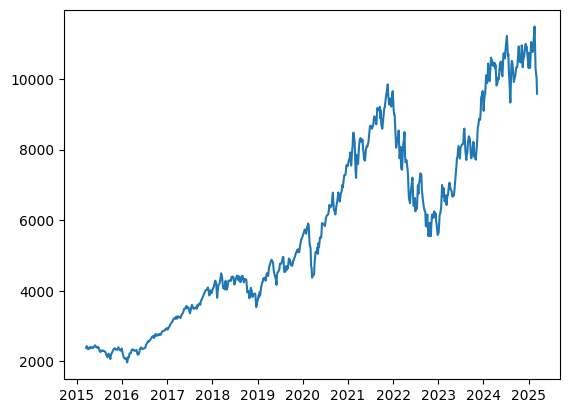

In [ ]:
plt.plot(pd.to_datetime(mainData['Date']),mainData['IndexValue_NDXT'])

In [ ]:
mainData.describe()

,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
count,913,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,9.130000e+02,913.000000,913.000000,913.000000,913.000000,9.130000e+02,913.000000,913.000000,913.000000
mean,2020-03-12 23:59:59.999999744,268.880823,5826.367587,12.024689,5874.426716,5767.759629,85.844424,3.442635e+07,100.353592,86.733572,84.917648,101.453821,1.125786e+08,100.353592,101.453821,99.383659
min,2015-03-16 00:00:00,236.525000,1970.321902,-410.535570,1982.654425,1942.623335,26.637000,1.182194e+07,22.500000,26.990000,26.450000,22.917500,2.818354e+07,22.500000,22.917500,22.500000
25%,2017-09-13 00:00:00,246.593048,3602.309640,-22.943769,3642.394105,3582.904090,48.880500,2.538963e+07,38.992500,49.128000,48.458000,39.257500,6.966882e+07,38.992500,39.257500,38.667500
50%,2020-03-13 00:00:00,257.120534,5460.604986,9.791799,5474.179502,5359.249833,69.105500,3.080694e+07,73.990650,69.832000,68.600500,74.887500,9.884778e+07,73.990650,74.887500,73.639950
75%,2022-09-11 00:00:00,296.872500,8022.733342,48.894365,8102.110490,7943.793072,123.480000,3.939964e+07,158.930000,125.320000,121.960000,161.020000,1.377482e+08,158.930000,161.020000,156.532800
max,2025-03-11 00:00:00,315.656565,11488.597874,574.462695,11551.935523,11381.719038,201.230000,1.310351e+08,250.080000,203.750000,200.100000,253.830000,4.611536e+08,250.080000,253.830000,249.780000
std,NaN,26.838667,2662.979162,100.382439,2691.088205,2635.763850,45.306285,1.441920e+07,67.320006,45.860285,44.844166,68.021712,6.181312e+07,67.320006,68.021712,66.632652
